# Neural Network Hyperparameter Tuning

## Setup

In [88]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("FashionMNIST-NN-Optimization"):
    raise ValueError("Please change working directory to 'path/FashionMNIST-NN-Optimization' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/FashionMNIST-NN-Optimization


In [89]:
!pip install -r requirements.txt

In [90]:
import zipfile
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Fetch data

In [91]:
with zipfile.ZipFile("data/fashion_mnist_data.zip", 'r') as zip_ref:
    zip_ref.extractall("data/")

In [92]:
fmnist_train = pd.read_csv("data/fashion_mnist_train.csv")
fmnist_test = pd.read_csv("data/fashion_mnist_test.csv")

## Split data

In [93]:
y_train_valid = fmnist_train["label"]
X_train_valid = fmnist_train.drop("label", axis=1)
y_test = fmnist_test["label"]
X_test = fmnist_test.drop("label", axis=1)

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=1/12, stratify=y_train_valid)

In [95]:
X_train, X_valid, X_test = X_train/255, X_valid/255, X_test/255

## Building the model

In [96]:
input_shape = (X_train.shape[1], )

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=input_shape),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

/Users/irellzane/MLprojects/FashionMNIST-NN-Optimization/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Implement Early Stopping Callback

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience = 8,
    restore_best_weights = True
)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), callbacks=[early_stopping], epochs=30)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 826us/step - accuracy: 0.7660 - loss: 0.6568 - val_accuracy: 0.8526 - val_loss: 0.4044
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.8590 - loss: 0.3829 - val_accuracy: 0.8666 - val_loss: 0.3712
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - accuracy: 0.8757 - loss: 0.3401 - val_accuracy: 0.8680 - val_loss: 0.3635
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - accuracy: 0.8820 - loss: 0.3154 - val_accuracy: 0.8768 - val_loss: 0.3401
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 733us/step - accuracy: 0.8904 - loss: 0.2941 - val_accuracy: 0.8784 - val_loss: 0.3260
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - accuracy: 0.8947 - loss: 0.2793 - val_accuracy: 0.8780 - val_loss: 0.3296
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - accuracy: 0.9011 - loss: 0.2634 - val_accuracy: 0.8814 - val_loss: 0.3291
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - accuracy: 0.9044 -

In [ ]:
model.evaluate(X_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.8826 - loss: 0.3315


[0.32491809129714966, 0.8835999965667725]

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - accuracy: 0.8800 - loss: 0.3459


[0.3376295268535614, 0.8841000199317932]

## Manually tuning number of layers

In [ ]:
def build_model(n_layers):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(shape=input_shape))
    model.add(tf.keras.layers.Dense(100, activation="relu"))

    for _ in range(1, n_layers):
        model.add(tf.keras.layers.Dense(100, activation="relu"))

    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    return model

In [ ]:
model_1l = build_model(n_layers=1)
model_1l.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model_1l.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10)

/Users/irellzane/MLprojects/FashionMNIST-NN-Optimization/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 724us/step - accuracy: 0.7687 - loss: 0.6574 - val_accuracy: 0.8426 - val_loss: 0.4360
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.8550 - loss: 0.4016 - val_accuracy: 0.8566 - val_loss: 0.3954
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step - accuracy: 0.8709 - loss: 0.3549 - val_accuracy: 0.8730 - val_loss: 0.3577
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.8819 - loss: 0.3244 - val_accuracy: 0.8768 - val_loss: 0.3509
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 588us/step - accuracy: 0.8888 - loss: 0.3045 - val_accuracy: 0.8794 - val_loss: 0.3458
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 599us/step - accuracy: 0.8940 - loss: 0.2885 - val_accuracy: 0.8778 - val_loss: 0.3357
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 615us/step - accuracy: 0.9001 - loss: 0.2739 - val_accuracy: 0.8790 - val_loss: 0.3331
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - accuracy: 0.9037 -

In [ ]:
model_1l.evaluate(X_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.8775 - loss: 0.3351


[0.32072076201438904, 0.883400022983551]

In [ ]:
models_per_n_layers = [model_1l]
for n_layers in range(2, 10):
    model = build_model(n_layers=n_layers)
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, verbose=0)
    models_per_n_layers.append(model)

/Users/irellzane/MLprojects/FashionMNIST-NN-Optimization/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/irellzane/MLprojects/FashionMNIST-NN-Optimization/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/irellzane/MLprojects/FashionMNIST-NN-Optimization/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, pr

In [ ]:
def get_model_loss(model, X, y):
    return model.evaluate(X, y, verbose=0)[0]

valid_losses = [get_model_loss(model, X_valid, y_valid) for model in models_per_n_layers]

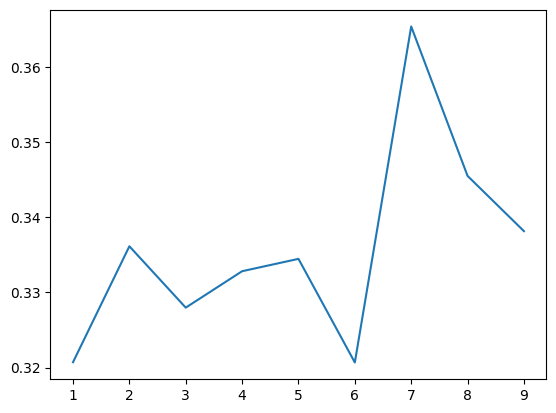

In [ ]:
plt.plot(range(1, 10), valid_losses)
plt.show()